# Analiza wartości brakujących w zbiorze danych titanic

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('../Zbiór danych Titanic.arff.txt', header=None, skiprows=17, na_values='?', sep=',')
colnames = ['Pclass', 'Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Boat', 'Body', 'Home Destination']
titanic_df.columns = colnames
titanic_df.index.name = 'PassengerId'
titanic_df.head()

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home Destination
PassengerId,,,,,,,,,,,,,,
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Mamy 14 cech w zbiorze: <br>
- Pclass: Nr klasy <br>
- Survived: Czy osoba przeżyła <br>
- Name: Imię i nazwisko <br>
- Sex: Płeć <br>
- Age: Wiek <br>
- SibSp: Liczba rodzeństwa/małżonków na pokładzie <br>
- Parch: Liczba rodziców/dzieci na pokładzie <br>
- Ticket: Nr biletu <br>
- Fare: Cena za bilet <br>
- Cabin: Id kabiny <br>
- Embarked: Gdzie osoba wsiadła <br>
- Boad: Nr łodzi ratunkowej, do której wsiadła <br>
- Body: Nr znalezionego ciała <br>
- Home Destination: Destynacja <br>

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            1309 non-null   int64  
 1   Survived          1309 non-null   int64  
 2   Name              1309 non-null   object 
 3   Sex               1309 non-null   object 
 4   Age               1046 non-null   float64
 5   SibSp             1309 non-null   int64  
 6   Parch             1309 non-null   int64  
 7   Ticket            1309 non-null   object 
 8   Fare              1308 non-null   float64
 9   Cabin             295 non-null    object 
 10  Embarked          1307 non-null   object 
 11  Boat              486 non-null    object 
 12  Body              121 non-null    float64
 13  Home Destination  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


**Ile jest wierszy z wartościami brakującymi w poszczególnych kolumnach**

In [4]:
titanic_df.isnull().sum()

Pclass                 0
Survived               0
Name                   0
Sex                    0
Age                  263
SibSp                  0
Parch                  0
Ticket                 0
Fare                   1
Cabin               1014
Embarked               2
Boat                 823
Body                1188
Home Destination     564
dtype: int64

**Jaką część całkowitej ilości wierszy stanowią brakujące wartości**

In [5]:
titanic_df.isnull().mean()

Pclass              0.000000
Survived            0.000000
Name                0.000000
Sex                 0.000000
Age                 0.200917
SibSp               0.000000
Parch               0.000000
Ticket              0.000000
Fare                0.000764
Cabin               0.774637
Embarked            0.001528
Boat                0.628724
Body                0.907563
Home Destination    0.430863
dtype: float64

Można zauważyć, że kolumny **Fare, Embarked** mają mniej niż 5% brakujących wartości, więc można po prostu usunąć wiersze z wartościami brakującymi. Nad resztą trzeba się zastanowić


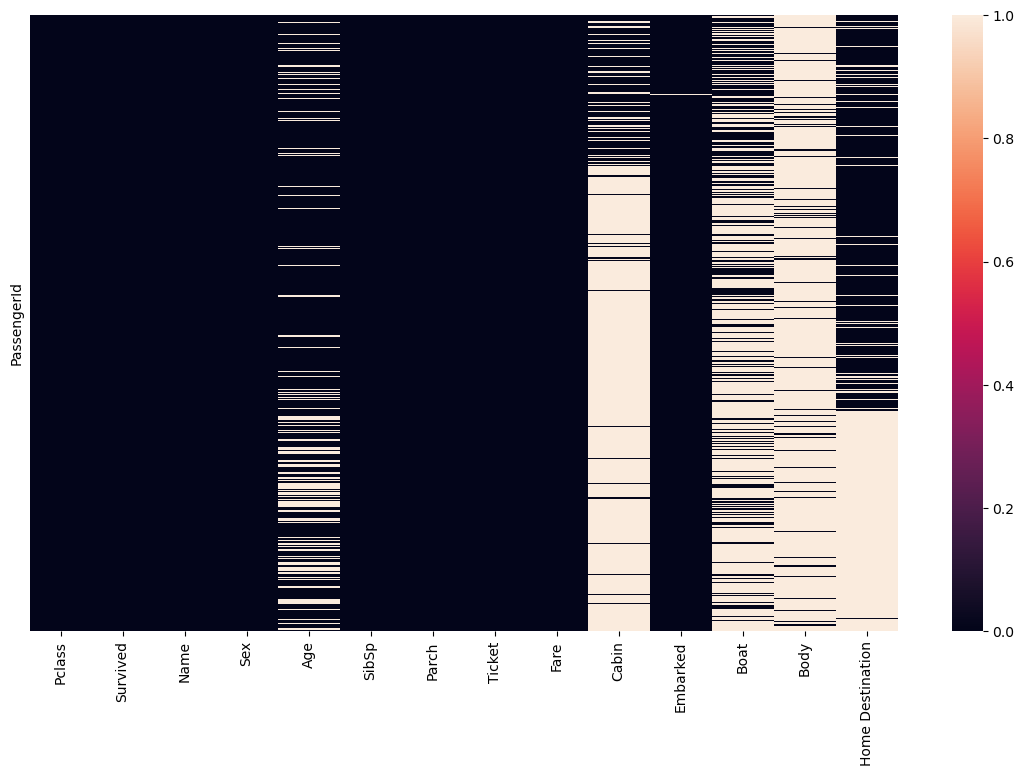

In [6]:
fig = plt.figure(figsize=(14,8))
sns.heatmap(titanic_df.isnull(), yticklabels=False)
fig.show()

In [7]:
def add_null_column(df, column):
    df[f'{column}Null'] = np.where(df[column].isnull(), 1, 0)

In [8]:
nulls_cols = list(titanic_df.columns[titanic_df.isnull().sum() > 0])
for column in nulls_cols:
    add_null_column(titanic_df, column)

In [9]:
groupby_df = pd.DataFrame()
for column in nulls_cols:
    groupby_df[column] = titanic_df.groupby(['Survived'])[f'{column}Null'].mean()
groupby_df

,Age,Fare,Cabin,Embarked,Boat,Body,Home Destination
Survived,,,,,,,
0,0.234858,0.001236,0.873918,0.000,0.988875,0.850433,0.508035
1,0.146000,0.000000,0.614000,0.004,0.046000,1.000000,0.306000


## Age
W tym przypadku można zastąpić brakujące wartości medianą. <br> (Operacje na brakujących wartościach zostaną wykonane na końcu dokumentu, aby nie przeszkadzały w wykrywaniu zależności pomiędzy brakującymi wartościami)

Jak widać poniżej prawie wszystkie brakujące wartości w kolumnie Age (poza jedną) mają również brakujące wartości w kolumnie **Body**, co oznacza że nie znamy wieku tych osób, których ciał nigdy nie odnaleziono.

Dzięki temu wartości braujące w kolumnie **Age** można uznać za **Missing at Random**

In [10]:
len(titanic_df[(titanic_df['AgeNull'] == 1) & (titanic_df['BodyNull'] == 1)]) / titanic_df['Age'].isnull().sum()

0.9961977186311787

In [11]:
age_median = titanic_df['Age'].median()
titanic_df['Age'].fillna(age_median, inplace=True)

## Fare
W tym przypadku liczba brakujących wartości wynosi mniej niż 5%, więc takie wiersze można bez problemu usunąć, a brakujące dane nie mają żadnego związku z innymi <br>
**Missing Completely at Random**

## Cabin
W tym przypadku brakujących wartości jest za dużo **(77%)**, żeby usuwać wiersze lub zastępować je wartościami średnimi (zmienna nie jest numeryczna), więc będzie trzeba usunąć całą kolumnę

Można zauważyć, że zdecydowana większość wartości brakujących w tej kolumnie wiąże się z wartościami brakującymi w kolumnie Body, co oznacza że nie znaleziono id kabin pasażerów, którzy zginęli. <br>
**Missing at Random**

In [12]:
len(titanic_df[(titanic_df['CabinNull'] == 1) & (titanic_df['BodyNull'] == 1)]) / titanic_df['Cabin'].isnull().sum()

0.9122287968441815

## Embarked

Tutaj jest podobnie jak w przypadku kolumny **Fare**, gdyż liczba brakujących wartości wynosi mniej niż 5%, więc takie wiersze można bez problemu usunąć, a same brakujące dane nie mają związku z innymi. <br>
**Missing Completely at Random**

## Boat

W tym przypadku zdaje się być za dużo brakujących wartości **63%**, więc kolumna jest do usunięcia. Samo występowanie brakujących wartości jest silnie powiązane z kolumną **Survived**, gdyż 98% osób które zginęły nie dostały się na łódź ratunkową, co wydaje się być zrozumiałe. Dodatkowo w 85% przypadków nie znaleziono ciała osoby, która nie dostałą się na łódź ratunkową <br>
Zważając na te obserwacje, można wywnioskować że obecność wartości brakujących w kolumnie **Boat** nie jest przypadkowa <br>
**Missing Not at Random**

In [13]:
len(titanic_df[(titanic_df['BoatNull'] == 1) & (titanic_df['BodyNull'] == 1)]) / titanic_df['Boat'].isnull().sum()

0.8529769137302552

## Body 

Tutaj jest bardzo podobny przypadek, ponieważ **90%** brakujących wartości zmusza nas do usunięcia całej kolumny. Dodatkowo w tej kolumnie sytuacja z wartościami brakującymi jest najbradziej jasna, gdyż osoby które przeżyły mają brakującą wartość w tej kolumnie, ponieważ jeśli ktoś przeżył, to nie zalicza się go jako osobę, której ciało odnaleziono. <br>
Jak wspomniano wyżej istnieje też powiązanie z kolumną **Boat** wyjaśnione powyżej <br>
**Missing Not at Random**

## Home Destination

Tutaj również jesteśmy zmuszeni do usunięcia całej kolumny, bo **43%** wartości jest brakujących, a kolumna nie jest numeryczna. <br>
Nie wygląda na to, żeby brakujące wartości miały tutaj powiązanie z innymi, więc można je uznać za kompletnie losowe <br>
**Missing Completely at Random**

**Po wyjaśnieniu przyczyn i zależności między brakującymi wartościami można przystąpić do działania na nich**

In [14]:
age_median = titanic_df['Age'].median()
titanic_df['Age'].fillna(age_median, inplace=True)
titanic_df.dropna(axis=0, subset=['Embarked', 'Fare'], inplace=True)
#titanic_df.drop(['Cabin', 'Boat', 'Body', 'Home Destination'],axis=1,  inplace=True)
titanic_df['Boat'].fillna(0, inplace=True)
titanic_df['Body'].fillna(0, inplace=True)

In [15]:
titanic_df.head()

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Boat,Body,Home Destination,AgeNull,FareNull,CabinNull,EmbarkedNull,BoatNull,BodyNull,Home DestinationNull
PassengerId,,,,,,,,,,,,,,,,,,,,,
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,...,2,0.0,"St Louis, MO",0,0,0,0,0,1,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,...,11,0.0,"Montreal, PQ / Chesterville, ON",0,0,0,0,0,1,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,...,0,0.0,"Montreal, PQ / Chesterville, ON",0,0,0,0,1,1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,...,0,135.0,"Montreal, PQ / Chesterville, ON",0,0,0,0,1,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,...,0,0.0,"Montreal, PQ / Chesterville, ON",0,0,0,0,1,1,0


In [16]:
titanic_df.drop(['AgeNull', 'FareNull', 'CabinNull', 'EmbarkedNull', 'BoatNull', 'BodyNull', 'Home DestinationNull'], axis=1, inplace=True)
titanic_df.head()

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home Destination
PassengerId,,,,,,,,,,,,,,
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"


In [17]:
titanic_df.to_csv('titanic_df.csv')